In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
gas=pd.read_csv('https://raw.githubusercontent.com/KeithGalli/matplotlib_tutorial/master/gas_prices.csv')

In [4]:
gas.head(5)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


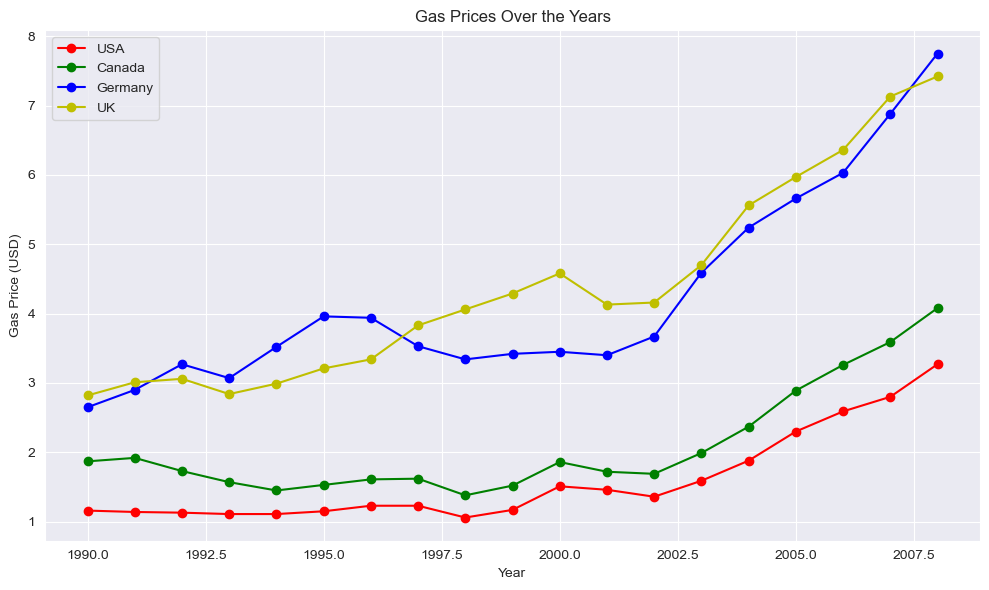

In [10]:
# Plotting
plt.figure(figsize=(10, 6))

# Extracting data
countries = ['USA', 'Canada', 'Germany', 'UK']
colors = ['r', 'g', 'b', 'y']

for country, color in zip(countries, colors):
    plt.plot(gas['Year'], gas[country], marker='o', label=country, color=color)

plt.xlabel('Year')
plt.ylabel('Gas Price (USD)')
plt.title('Gas Prices Over the Years')
plt.legend()

plt.grid(True)
plt.tight_layout()

# Save plot as PNG
plt.savefig('ElvisAsamani_gas_prices.png')

# Display plot
plt.show()




In [7]:
# Save plot as PNG
plt.savefig('ElvisAsamani_gas_prices.png')


<Figure size 640x480 with 0 Axes>

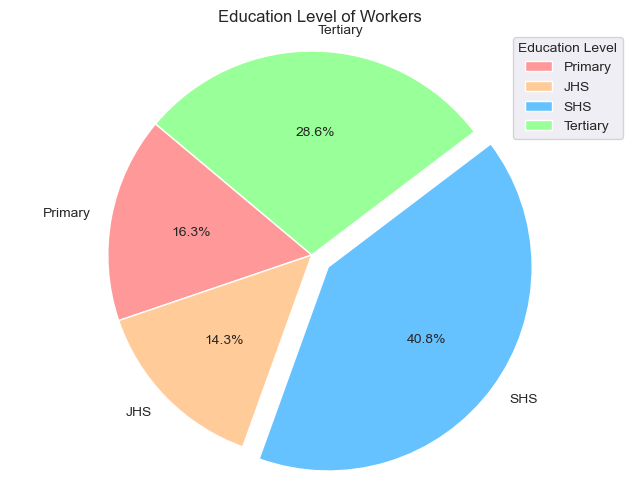

In [14]:


# Data
Workers = [40, 35, 100, 70]
Education = ['Primary', 'JHS', 'SHS', 'Tertiary']
colors = ['#ff9999', '#ffcc99', '#66c2ff', '#99ff99']
explode = (0, 0, 0.1, 0)  # "explode" the 3rd slice (SHS)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(Workers, labels=Education, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Education Level of Workers')

# Add legend
plt.legend(title='Education Level', loc='best')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save plot as PNG
plt.savefig('ElvisAsamani_education_pie.png')

# Show plot
plt.show()


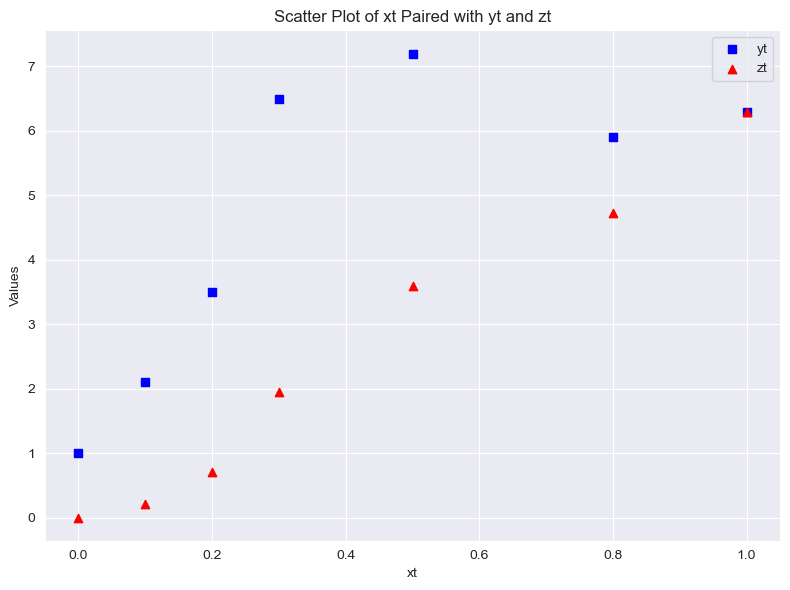

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
xt = np.array([0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0])
yt = np.array([1.0, 2.1, 3.5, 6.5, 7.2, 5.9, 6.3])
zt = xt * yt

# Plot
plt.figure(figsize=(8, 6))

# Scatter plot for yt with square markers
plt.scatter(xt, yt, label='yt', marker='s', color='blue')

# Scatter plot for zt with triangle markers
plt.scatter(xt, zt, label='zt', marker='^', color='red')

plt.xlabel('xt')
plt.ylabel('Values')
plt.title('Scatter Plot of xt Paired with yt and zt')
plt.legend()

plt.grid(True)
plt.tight_layout()

# Save plot as PNG
plt.savefig('elvisasamani_scatter_plot.png')

# Show plot
plt.show()


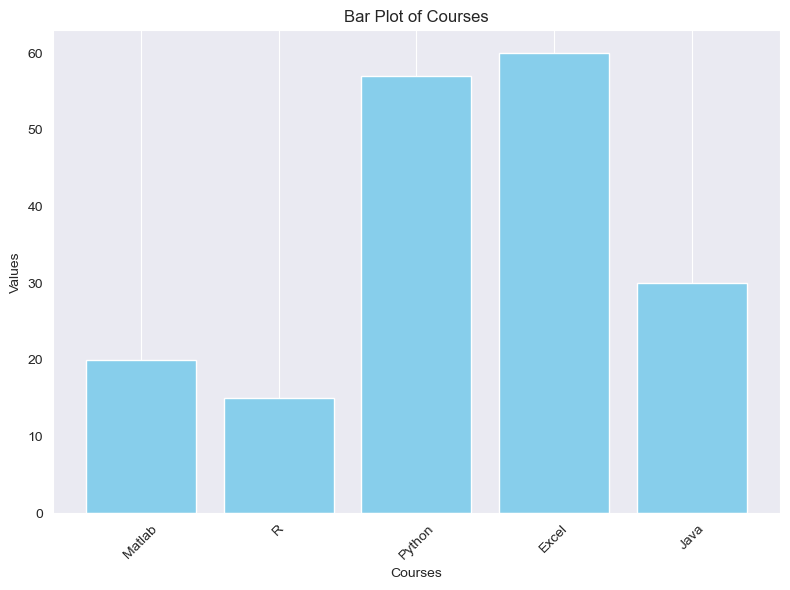

In [17]:


# Data
courses = ['Matlab', 'R', 'Python', 'Excel', 'Java']
values = [20, 15, 57, 60, 30]

# Plot
plt.figure(figsize=(8, 6))

plt.bar(courses, values, color='skyblue')  # Customizing color

plt.xlabel('Courses')
plt.ylabel('Values')
plt.title('Bar Plot of Courses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')  # Adding grid lines for y-axis

plt.tight_layout()

# Save plot as PNG
plt.savefig('yourname_bar_plot.png')

# Show plot
plt.show()


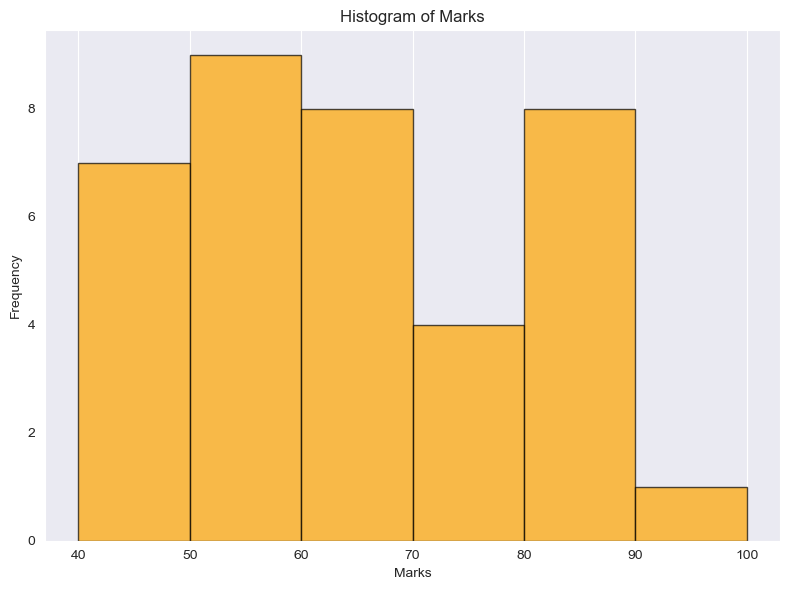

In [18]:

from random import randint

# Data
marks = [randint(20, 90) for i in range(50)]
bins = [40, 50, 60, 70, 80, 90, 100]

# Plot
plt.figure(figsize=(8, 6))

plt.hist(marks, bins=bins, color='orange', edgecolor='black', alpha=0.7)  # Customizing histogram color and edgecolor

plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Histogram of Marks')
plt.xticks(bins)

plt.grid(axis='y')  # Adding grid lines for y-axis

plt.tight_layout()

# Save plot as PNG
plt.savefig('yourname_histogram.png')

# Show plot
plt.show()


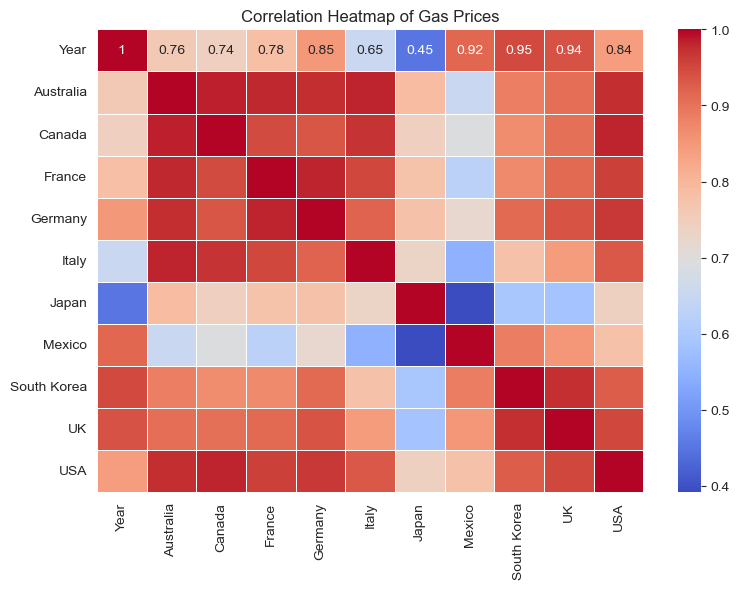

In [20]:
# Load data
gas_prices = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/matplotlib_tutorial/master/gas_prices.csv')

# Calculate correlation matrix
correlation_matrix = gas_prices.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Customizing colormap and adding annotations
plt.title('Correlation Heatmap of Gas Prices')  # Adding title

plt.tight_layout()

# Save plot as PNG
plt.savefig('elvisasamani_gas_prices_heatmap.png')

# Show plot
plt.show()

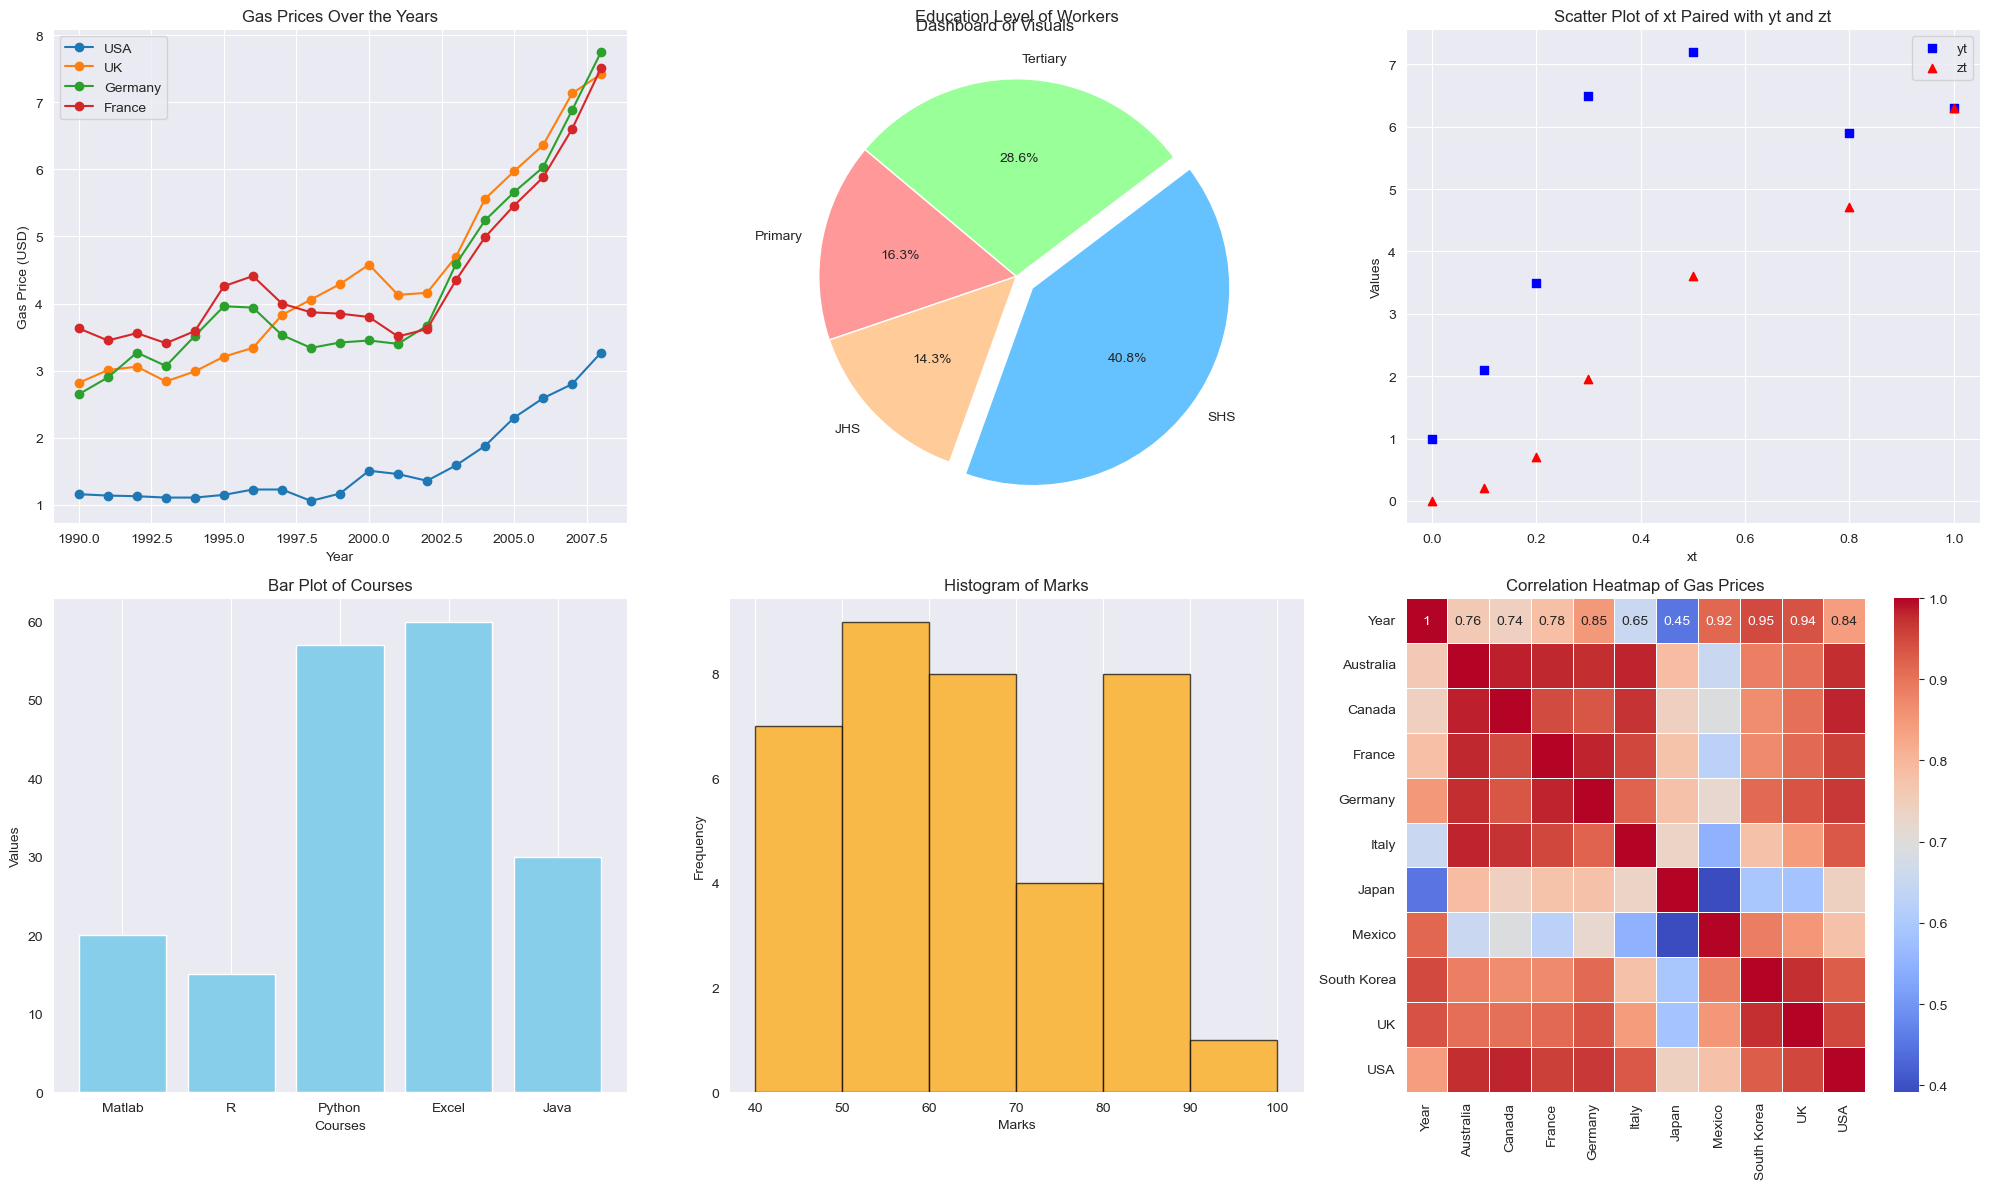

In [22]:
plt.figure(figsize=(20, 12))


# Visual 1: Line plot
plt.subplot(2, 3, 1)
plt.plot(gas_prices['Year'], gas_prices['USA'], marker='o', label='USA')
plt.plot(gas_prices['Year'], gas_prices['UK'], marker='o', label='UK')
plt.plot(gas_prices['Year'], gas_prices['Germany'], marker='o', label='Germany')
plt.plot(gas_prices['Year'], gas_prices['France'], marker='o', label='France')
plt.xlabel('Year')
plt.ylabel('Gas Price (USD)')
plt.title('Gas Prices Over the Years')
plt.legend()

# Visual 2: Pie plot
plt.subplot(2, 3, 2)
Workers = [40, 35, 100, 70]
Education = ['Primary', 'JHS', 'SHS', 'Tertiary']
colors = ['#ff9999', '#ffcc99', '#66c2ff', '#99ff99']  # Bright colors
explode = (0, 0, 0.1, 0)  # "explode" the 3rd slice (SHS)
plt.pie(Workers, labels=Education, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Education Level of Workers')

# Visual 3: Scatter plot
plt.subplot(2, 3, 3)
xt = np.array([0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0])
yt = np.array([1.0, 2.1, 3.5, 6.5, 7.2, 5.9, 6.3])
zt = xt * yt
plt.scatter(xt, yt, label='yt', marker='s', color='blue')
plt.scatter(xt, zt, label='zt', marker='^', color='red')
plt.xlabel('xt')
plt.ylabel('Values')
plt.title('Scatter Plot of xt Paired with yt and zt')
plt.legend()

# Visual 4: Bar plot
plt.subplot(2, 3, 4)
courses = ['Matlab', 'R', 'Python', 'Excel', 'Java']
values = [20, 15, 57, 60, 30]
plt.bar(courses, values, color='skyblue')  # Customizing color
plt.xlabel('Courses')
plt.ylabel('Values')
plt.title('Bar Plot of Courses')
plt.grid(axis='y')

# Visual 5: Histogram
plt.subplot(2, 3, 5)
plt.hist(marks, bins=bins, color='orange', edgecolor='black', alpha=0.7)  # Customizing histogram color and edgecolor
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Histogram of Marks')
plt.xticks(bins)
plt.grid(axis='y')

# Visual 6: Heatmap
plt.subplot(2, 3, 6)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Customizing colormap and adding annotations
plt.title('Correlation Heatmap of Gas Prices')  # Adding title

# Adjust layout
plt.tight_layout()

# Add super title
plt.suptitle('Dashboard of Visuals')

# Save plot as PNG
plt.savefig('elvis_dashboard_visuals_subplot.png')

# Show plot
plt.show()